In [10]:
%pip install timm
%pip install torch==1.10.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 748.8 MB 3.1 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 2.3.0rc0+c6b5ca2 requires Pillow<=6.2.2, but you have pillow 9.0.1 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 881.9 MB 5.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstal

### Обучение модели

INFO: DEVICE is cuda

Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth ...

Validation	acc: 0.0000, wer: 1.2385, cer: 10.5831, loop_time: 0m 8s

Epoch 0, Loss: 2.33967, cer: 1.0154, LR: 0.0001318, loop_time: 1m 2s

Validation	acc: 0.0000, wer: 1.0000, cer: 0.8960, loop_time: 0m 6s
Model weights saved

Epoch 1, Loss: 1.03226, cer: 0.8419, LR: 0.0003721, loop_time: 1m 5s

Validation	acc: 0.0000, wer: 1.0002, cer: 0.8970, loop_time: 0m 11s

Epoch 2, Loss: 0.73310, cer: 0.5601, LR: 0.0006690, loop_time: 1m 2s

Validation	acc: 0.0000, wer: 1.0088, cer: 0.4456, loop_time: 0m 6s

Epoch 3, Loss: 0.65512, cer: 0.4503, LR: 0.0009089, loop_time: 1m 2s

Validation	acc: 0.0000, wer: 1.0097, cer: 0.3840, loop_time: 0m 6s

Epoch 4, Loss: 0.57158, cer: 0.3816, LR: 0.0010000, loop_time: 1m 2s

Validation	acc: 0.0000, wer: 0.9953, cer: 0.3222, loop_time: 0m 6s

Epoch 5, Loss: 0.46808, cer: 0.3989, LR: 0.0009988, loop_time: 1m 2s


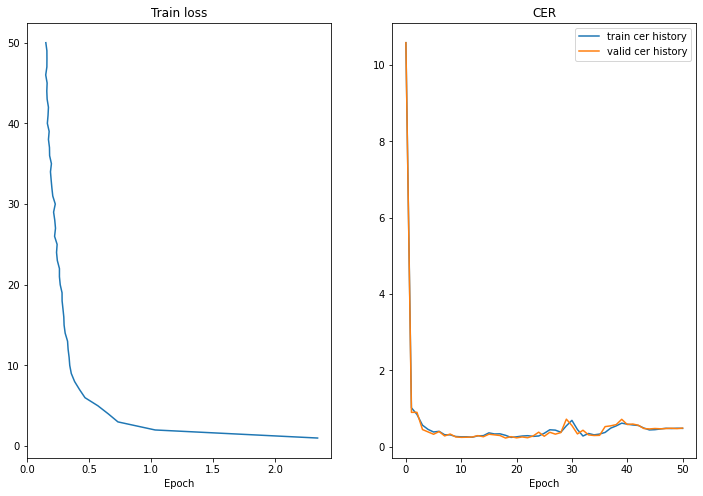

<Figure size 432x288 with 0 Axes>

In [11]:
#!g1.1
%run train.py

In [12]:
import cv2
import random

from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

from utils.predictor import OcrPredictor

In [13]:
images_directory = '../data/handwritten_names/test_v2/test'
models_directory = '../data/experiments/test'
CONFIG_PATH = './configs/ocr_config.json'
DEVICE = 'cuda'

In [14]:
images = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]
models = [f for f in listdir(models_directory) if isfile(join(models_directory, f))]

models = sorted(models, key=lambda model_name: model_name[6:model_name.find('-', 6)], reverse=True)
model_path = join(models_directory, models[0])

In [15]:
image_path = join(images_directory, random.choice(images))

In [16]:
#!g1.1
predictor = OcrPredictor(
    model_path=model_path,
    config_path=CONFIG_PATH,
    device=DEVICE
)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth" to /tmp/xdg_cache/torch/hub/checkpoints/deit_small_patch16_224-cd65a155.pth



Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_small_patch16_224-cd65a155.pth ...


In [17]:
img = cv2.imread(image_path)

In [18]:
#!g1.1
pred_data = predictor(img)

Prediction: TMARIUS


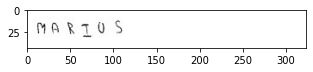

In [19]:
print("Prediction: " + pred_data)

plt.figure(figsize=(5, 5))
plt.imshow(img)